<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/JingQian_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
# 1) replicate lesson code
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)
display(example)

In [2]:
# Your Work Here
# 2) download the data behind How Popular is Donald Trump?
# approval_polllist.csv contain President Trump's job approval ratings.
# approval_topline.csv contains a trendline for the approval ratings.

import pandas as pd
df1 = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv')
df2 = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_topline.csv')

df1.head(10)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,11/1/2019,1/20/2017,1/22/2017,Morning Consult,B-,1992.0,rv,0.944206,0.0,46.0,37.0,44.437943,38.667426,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,16:58:55 1 Nov 2019
1,Donald Trump,All polls,11/1/2019,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.245429,0.0,45.0,45.0,46.067724,43.414510,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,16:58:55 1 Nov 2019
2,Donald Trump,All polls,11/1/2019,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.226788,0.0,45.0,46.0,46.067724,44.414510,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,16:58:55 1 Nov 2019
3,Donald Trump,All polls,11/1/2019,1/20/2017,1/24/2017,Ipsos,B+,1632.0,a,0.224456,0.0,42.1,45.2,42.831271,44.083608,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,16:58:55 1 Nov 2019
4,Donald Trump,All polls,11/1/2019,1/21/2017,1/25/2017,Ipsos,B+,1651.0,a,0.209948,0.0,42.3,45.8,43.031271,44.683608,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49425,77598,3/1/2017,16:58:55 1 Nov 2019
5,Donald Trump,All polls,11/1/2019,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.220390,0.0,57.0,43.0,51.285941,44.523207,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,16:58:55 1 Nov 2019
6,Donald Trump,All polls,11/1/2019,1/20/2017,1/25/2017,Quinnipiac University,A-,1190.0,rv,1.644662,0.0,36.0,44.0,37.759327,42.757947,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,16:58:55 1 Nov 2019
7,Donald Trump,All polls,11/1/2019,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.212047,0.0,46.0,45.0,47.067724,43.414510,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,16:58:55 1 Nov 2019
8,Donald Trump,All polls,11/1/2019,1/23/2017,1/25/2017,Gallup,B,1500.0,a,0.200168,0.0,46.0,45.0,47.067724,43.414510,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49245,77257,1/26/2017,16:58:55 1 Nov 2019
9,Donald Trump,All polls,11/1/2019,1/23/2017,1/24/2017,Public Policy Polling,B,1043.0,rv,1.165807,0.0,44.0,44.0,43.492306,44.314211,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,49237,77249,1/25/2017,16:58:55 1 Nov 2019


In [3]:
df2.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,11/1/2019,41.761986,46.089869,37.434102,54.598524,59.037402,50.159646,17:00:49 1 Nov 2019
1,Donald Trump,Adults,11/1/2019,39.926900,43.275037,36.578763,54.824583,59.307879,50.341287,16:59:40 1 Nov 2019
2,Donald Trump,All polls,11/1/2019,40.880157,45.213012,36.547303,54.475360,58.859539,50.091181,16:58:55 1 Nov 2019
3,Donald Trump,Voters,10/31/2019,42.026711,46.199541,37.853881,54.036780,58.335322,49.738238,17:20:48 31 Oct 2019
4,Donald Trump,Adults,10/31/2019,40.149657,43.466626,36.832688,54.360924,58.825605,49.896243,17:19:40 31 Oct 2019


In [4]:
data = df1[['enddate', 'adjusted_approve', 'adjusted_disapprove']] # multiple columns should be in a list
data.head(4)

,enddate,adjusted_approve,adjusted_disapprove
0,1/22/2017,44.437943,38.667426
1,1/22/2017,46.067724,43.414510
2,1/23/2017,46.067724,44.414510
3,1/24/2017,42.831271,44.083608


In [5]:
tidy = pd.melt(data,  id_vars='enddate', value_vars=['adjusted_approve', 'adjusted_disapprove'])
tidy = tidy.rename(columns={'variable':'vote', 'value':'percent'})
tidy['vote']=tidy['vote'].str.replace('adjusted_', '')
tidy.head(10)

,enddate,vote,percent
0,1/22/2017,approve,44.437943
1,1/22/2017,approve,46.067724
2,1/23/2017,approve,46.067724
3,1/24/2017,approve,42.831271
4,1/25/2017,approve,43.031271
5,1/24/2017,approve,51.285941
6,1/25/2017,approve,37.759327
7,1/24/2017,approve,47.067724
8,1/25/2017,approve,47.067724
9,1/24/2017,approve,43.492306


In [6]:
trend = df2[['modeldate', 'approve_estimate', 'disapprove_estimate']]
trend.tail(5)                   
                     

,modeldate,approve_estimate,disapprove_estimate
3034,1/24/2017,45.44264,41.87849
3035,1/24/2017,45.00000,45.74659
3036,1/23/2017,45.46693,41.26452
3037,1/23/2017,45.00000,45.00000
3038,1/23/2017,46.00000,37.00000


In [7]:
trend_tidy = pd.melt(trend, id_vars='modeldate', value_vars=['approve_estimate','disapprove_estimate'])
trend_tidy

,modeldate,variable,value
0,11/1/2019,approve_estimate,41.761986
1,11/1/2019,approve_estimate,39.926900
2,11/1/2019,approve_estimate,40.880157
3,10/31/2019,approve_estimate,42.026711
4,10/31/2019,approve_estimate,40.149657
...,...,...,...
6073,1/24/2017,disapprove_estimate,41.878490
6074,1/24/2017,disapprove_estimate,45.746590
6075,1/23/2017,disapprove_estimate,41.264520
6076,1/23/2017,disapprove_estimate,45.000000


In [8]:
trend_tidy=trend_tidy.rename(columns={'variable':'vote', 'value':'percent'})
trend_tidy['vote']=trend_tidy['vote'].str.replace('_estimate','')
trend_tidy.head()

,modeldate,vote,percent
0,11/1/2019,approve,41.761986
1,11/1/2019,approve,39.926900
2,11/1/2019,approve,40.880157
3,10/31/2019,approve,42.026711
4,10/31/2019,approve,40.149657


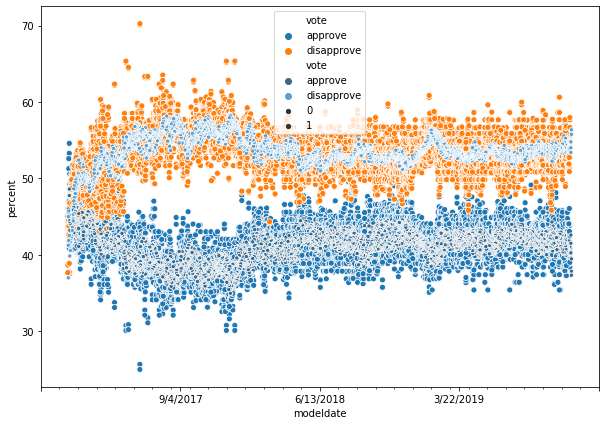

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

fig,ax = plt.subplots(1,1,figsize=[10, 7]);

sns.scatterplot(x='enddate', y='percent', data=tidy, hue='vote');
sns.scatterplot(x='modeldate', y='percent', data=trend_tidy, markers='.', size=1, hue='vote', palette="Blues_d");

for label in ax.xaxis.get_ticklabels():
      label.set_rotation(0)

# ax.set_xlim(np.min(data['enddate']), np.max(data['enddate']));
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
# # ax.set_ylim(0, 100)
# # helpful resources:   https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html


In [0]:
# import altair as alt
# source=data['adjusted_approve']
# line = alt.Chart(source).mark_line(color='red', size=3).transform_window(rolling_mean=np.mean(source), frame=[-15, 15]).encode(x='date:T',y='rolling_mean:Q')
# # how is this apply to a pandas dataframe?

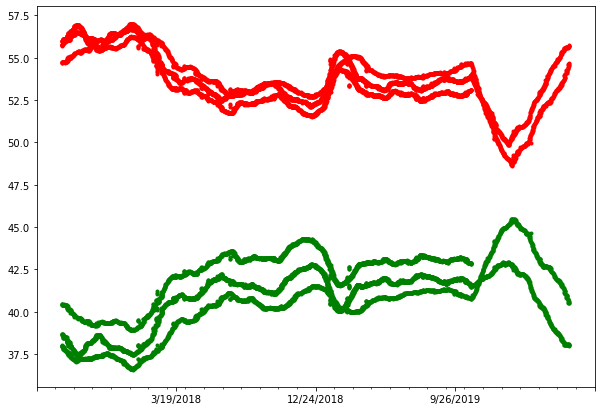

In [16]:
# let's implement a moving average  ??? what the heck???
data['MA_approve'] = data.iloc[:,1].rolling(window=200).mean()
data['MA_disapprove'] = data.iloc[:,2].rolling(window=200).mean()

fig1,ax1 = plt.subplots(1,1,figsize=[10, 7]);
data=data.dropna()
# sns.scatterplot(x='enddate', y='percent', data=tidy, hue='vote');
plt.plot(data['enddate'], data['MA_approve'], 'g.');
plt.plot(data['enddate'], data['MA_disapprove'],'r.');

# for label in ax.xaxis.get_ticklabels():
#       label.set_rotation(0)

# ax.set_xlim(np.min(data['enddate']), np.max(data['enddate']));
ax1.xaxis.set_major_locator(ticker.LinearLocator(5))
ax1.xaxis.set_minor_locator(ticker.LinearLocator(31))

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here